In [1]:
!pip install datascience
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", but you have pyqt5 5.14.1 which is incompatible.
spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", but you have pyqtwebengine 5.14.0 which is incompatible.


  Attempting uninstall: sphinx
    Found existing installation: Sphinx 4.0.1
    Uninstalling Sphinx-4.0.1:
      Successfully uninstalled Sphinx-4.0.1


# Chapter 9: Randomness

Data scientists have to understand randomness.  At times they will have to randomly assign itmes to treatment and controll groups, or they have to randomally pull data from a source.  

Numpy has a built in function that makes choices at random:
<code> np.random.choice(array_name)</code>, where <code>array_name</code> is the name of the array from which to make the choice.

Run the cell below a few times to see the output.

In [4]:
two_groups = make_array('treatment', 'control')
np.random.choice(two_groups)

'treatment'

We can also take a random choice <code>n</code> times

In [8]:
np.random.choice(['Yes', 'No'], 10)

array(['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
      dtype='<U3')

### Booleans and Comparison

Is 3 greater than 1?

In [18]:
3 > 1

True

In [10]:
type(3 > 1)

bool

In [11]:
True

True

In [12]:
true

NameError: name 'true' is not defined

Does 3 equal 3?

In [14]:
3 = 3

SyntaxError: can't assign to literal (<ipython-input-14-79bfd1be65e2>, line 1)

In [16]:
3 == 3 

True

In [17]:
3 != 0

True

In [19]:
x = 14
y = 3

In [20]:
x > 15

False

In [21]:
12 < x

True

In [22]:
x < 20

True

In [23]:
12 < x < 20

True

In [24]:
10 < x-y < 13

True

In [25]:
x > 13 and y < 3.14159

True

## Comparisons with arrays

In [26]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [27]:
pets == 'cat'

array([ True,  True, False,  True, False, False])

In [28]:
1 + 1 + 0 + 1 + 0 + 0

3

In [29]:
sum(make_array(True, True, False, True, False, False))

3

In [30]:
sum(pets == 'dog')

2

In [31]:
np.count_nonzero(pets == 'dog')

2

In [32]:
x = np.arange(20, 31)

In [33]:
x > 28

array([False, False, False, False, False, False, False, False, False,
        True,  True])

## Conditional Statements  -  If loops

Conditional statements allows Python to evaluate based on if a condition is true or false.  It the condition is true the block of code is evaluated.  If the condition is false the block of code is skipped. 

A conditional statements always begins with an <code>if</code> header, which is a single line followed by an indented body. The body is only executed if the expression directly following if (called the if expression) evaluates to a true value. If the if expression evaluates to a false value, then the body of the if is skipped.

In [39]:
def sign(x):
    
    if x > 0:
        return 'Positive'

In [40]:
sign(3)

'Positive'

In [41]:
sign(-3)

In [42]:
def sign(x):
    
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'

In [43]:
sign(-3)

'Negative'

In [44]:
sign(0)

In [45]:
def sign(x):
    
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'
    
    elif x == 0:
        return 'Neither positive nor negative'

In [46]:
sign(0)

'Neither positive nor negative'

In [52]:
sign('What about this')

'Error! Please proved a number'

### Copy the code above and change the function to return "Error! You provided a string. Please provide a number." if it is given a string

In [49]:
def sign(x):
    
    if type(x) == str:
        return 'Error! You provided a string. Please provide a number.'
    
    elif x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'
    
    elif x == 0:
        return 'Neither positive nor negative'

In [58]:
sign([4])

TypeError: '>' not supported between instances of 'list' and 'int'

In [53]:
sign(4)

'Positive'

In [54]:
sign(-34524.0243523)

'Negative'

In [55]:
sign(0)

'Neither positive nor negative'

There is always exactly one if clause, but there can be any number of elif clauses. Python will evaluate the if and elif expressions in the headers in order until one is found that is a true value, then execute the corresponding body. The else clause is optional. When an else header is provided, its else body is executed only if none of the header expressions of the previous clauses are true. The else clause must always come at the end (or not at all).

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

Start with step 1:

In [66]:
def roll(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [67]:
roll(3,4)

-1

In [68]:
roll(4,4)

0

In [69]:
roll(6,1)

1

Step 2:

In [87]:
die_faces = np.arange(1,7)

In [88]:
np.random.choice(die_faces)

1

In [89]:
def simulate_one_roll():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return roll(my_roll, your_roll)

In [95]:
simulate_one_roll()

-1

### Iterations and Appending Arrays

We now have a function that takes a roll of a dice and determins who wins.  We want to run the function 10,000 time to see who wins our dice game after 10,000 rolls.  Just run the above cell 10,00 times and add up the resutls.  Ha! Just kidding. That would be way too tedious.  We need to learn how to have Python run the simulation 10,000 and sum the outcomes.  To do that we first need to learn how to append arrays.

### Appending Arrays

In [96]:
first = np.arange(4)
second = np.arange(10, 17)

In [97]:
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [98]:
first

array([0, 1, 2, 3])

In [99]:
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [100]:
first

array([0, 1, 2, 3])

In [101]:
second

array([10, 11, 12, 13, 14, 15, 16])

### Repeated Betting ###

In [102]:
results = make_array()

In [107]:
results = np.append(results, simulate_one_roll())
results

array([ 1., -1., -1., -1., -1.])

Run the above cell a few times.  Each time the cell runs it appends the outcome of the dice roll to results

Now we will lean how to iterate over 10,000 simulations

### Iterations - <code>for</code> loops

A <code>for</code> statement is used to loop over the values of a sequence.  This is called an interation, where we iterate over the values of a sequence. The indented body of the for statement is executed once for each item in that sequence.

In [108]:
for animal in make_array('cat', 'dog', 'rabbit'):
    print(animal)

cat
dog
rabbit


In [109]:
for i in np.arange(5):
    print(simulate_one_roll())

-1
0
0
1
1


In [111]:
pets = make_array()
for animal in make_array('cat', 'dog', 'rabbit'):
    pets = np.append(animal, pets)
pets

array(['rabbit', 'dog', 'cat'], dtype='<U32')

### Putting it all together to simulate 10,000 rolls of our dice game.

In [116]:
results = make_array()
for i in np.arange(10000):
    results = np.append(simulate_one_roll(), results)
results

array([-1., -1.,  1., ..., -1., -1.,  1.])

In [117]:
len(results)

10000

In [118]:
sum(results)

-70.0

In [187]:
def dice_game(numer_of_games):
    results = make_array()
    for i in np.arange(numer_of_games):
        results = np.append(simulate_one_roll(), results)
    if sum(results) > 0:
        return print('You owe me ' + str(sum(results)) + ' dollars')
    elif sum(results) < 0:
        return print('I owe you ' + str(abs(sum(results))) + ' dollars')
    elif sum(results) == 0:
        return print('We broke even!')

In [189]:
dice_game(10000)

You owe me 41.0 dollars


In [162]:
result_table = Table().with_column('Outcome', results)

In [163]:
result_table

Outcome
-1
-1
1
-1
0
1
0
1
-1
0


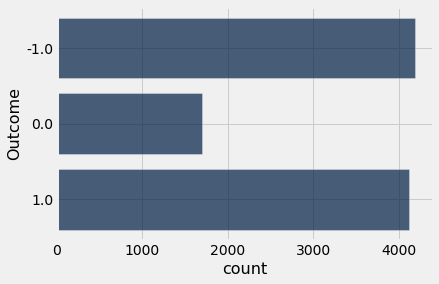

In [166]:
result_table.group('Outcome').barh('Outcome')

## Montey Hall Problem

During the 1960s there was a TV game show called "Lets Make a Deal".  Monty Hall hosted the show and one of the games was later known as the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). The contestant was given three doors.  One of the doors hid a new car while the other two doors hid a goat.  The contestents would pick a door and one of the other two doors not picked was opened to reveal a goat.  The contestant was then given the option to pick the other door or keep their existing door, in hopes of selecting the door with the new car.  Which door should the contesntant pick?  Should the contestent stick with their origianl door or should they choose the other door?


<img src="monty_hall_.png" style="width: 200px;"/>

[image source](https://en.wikipedia.org/wiki/Monty_Hall_problem)

You can logical come to the conclusion that the contestant should pick the other door and not their origianl door by the following logic:



* The chance that the car is behind the originally chosen door is 1/3.
* The car is behind either the originally chosen door or the door that remains. It can’t be anywhere else.
* Therefore, the chance that the car is behind the door that remains is 2/3.
* Therefore, the contestant should switch.


Not everyone is convinced by the above logic so lets run a simulation!


What to simulate?

For each play we will simulate what’s behind all three doors:

* the one the contestant first picks
* the one that Monty opens
* the remaining door

So we will be keeping track of three quantitites, not just one.

We will start by defining what is behind the three doors.

In [193]:
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'], dtype='<U11')

And defining the goats

In [192]:
goats = make_array('first goat', 'second goat')
goats

array(['first goat', 'second goat'], dtype='<U11')

To help Monty conduct the game, we are going to have to identify which goat is selected and which one is revealed behind the open door. The function other_goat takes one goat and returns the other.

In [194]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [195]:
other_goat('first goat')

'second goat'

In [196]:
other_goat('second goat')

'first goat'

In [197]:
other_goat('what goat?')

We are now ready to simulate one play. To do this, we will define a function monty_hall_game that takes no arguments. When the function is called, it plays Monty’s game once and returns a list consisting of:

* the contestant’s guess
* what Monty reveals when he opens a door
* what remains behind the other door

The game starts with the contestant choosing one door at random. In doing so, the contestant makes a random choice from among the car, the first goat, and the second goat.

If the contestant happens to pick one of the goats, then the other goat is revealed and the car is behind the remaining door.

If the contestant happens to pick the car, then Monty reveals one of the goats and the other goat is behind the remaining door.

In [204]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [208]:
monty_hall_game()

['second goat', 'first goat', 'car']

Run the above cell a few times to see how the simulation changes

Now it is time to run the simulation.  Let's run it 10,000 times.  We will append our data into a talbe with three columns: "Guess", "Revealed", "Remaining".

In [209]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [210]:
# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    games.append(monty_hall_game())

In [211]:
games

Guess,Revealed,Remaining
first goat,second goat,car
car,first goat,second goat
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
car,first goat,second goat
second goat,first goat,car
first goat,second goat,car


In [212]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3332
first goat,3406
second goat,3262


The first time the contestant choose a door it is about a 1/3% chance of picking the car.  

In [213]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6668
first goat,1640
second goat,1692


However, the car is behind the remaining door about 2/3 of the time!

Let's plot this graphically:

In [215]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
joined

Guess,count,count_2
car,3332,6668
first goat,3406,1640
second goat,3262,1692


In [216]:
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3332,6668
first goat,3406,1640
second goat,3262,1692


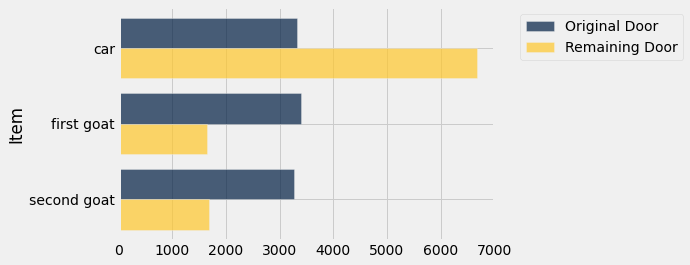

In [217]:
combined.barh(0)

From the bar plot, we can see the first choice is equally likely to be a car or one of the goats.  However, the remaining door is 2 times as likly to be the car!

## Probability

Probailities are numbers between 0 and 1, or 0% to 100%.  Impossible is 0 or 0% and guaranteed events are 1 or 100%

We define **P(Event)** as the probability an event happens.  The words *chance* and *probability* are interchangable.

**<center>P(Event does not happen) = 1 - P(Event)</center>**

When all events are equally likely to happen (like rolling a die).

**<center>P(Event) = (#Event outcomes) / (# of all outcomes)</center>**

What is the probability when two events must both happen in a particular order (like picking two out of three balls in order)?

Suppose you have 3 balls (blue, green, red).  What are the chances you pick the blue then the green ball?

* First to pick the blue ball. P(pick blue)= 1/3

* Second to pick the green ball. P(pick green) = 1/2

* P(to pick blue then green) = 1/3 * 1/2 = 1/6

In general we have have the multiplication rule:

**<center>P(two event happn) = P(first event) * P(second event)</center>**

What is the probability that two events must happen in any order (like picking two out of three balls in any order)?

Suppose you have 3 balls (blue, green, red).  What are the chances you pick the blue and the green ball?

* To pick the blue ball. P(pick blue)= 1/3
* To pick the green ball. P(pick green) = 1/3

P(pick blue and green) = 1/3 + 1/3 = 2/6 = 1/3

In general we have have the additive rule:

**<center>P(two event happn) = P(first event) + P(second event)</center>**

What is the probability that at least one event happens (like getting one heads on four coin flips)?

Suppose you have coin and you flip it four times. What are the chances you flip at least one head?

The four possible outcomes are:  HH, HT, TH, TT.  

* To to flip heads. P(heads)= 3/4

Or you can think of the probalbilty as not fliping two tails

* To to flip heads = Not to flip two tails = 1 - P(both tails) = 1 - 1/4 = 3/4

Note:

* P(both tails) = 1/2 * 1/2 = (1/2)^2 = 1/4

At least one head in 25 tosses:

* P(heads = 1 - P(all are tails) = 1 - (1/2)^17


**<center>P(two event happn) = P(first event) + P(second event)</center>**

Going back to the dice example:  What is the chance we will roll a six if givin 6 rolls of a dice?

* P(six) = 1/6 = 1 - P(not a six) = 1 - (5/6)

* P(one six in two rolls) = 1 - P(both are not 6) = 1 - (5/6)^2

Let's put the chances of rolling one six in 1 to 50 rolls into a table:

In [243]:
rolls = np.arange(1, 51, 1)
results = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
results

Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


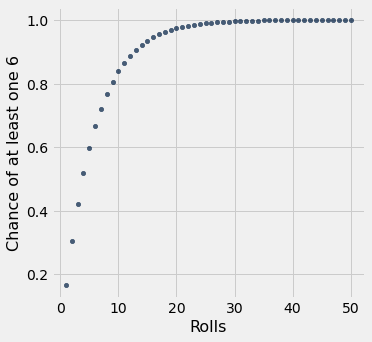

In [244]:
results.scatter('Rolls')

In [245]:
results.where('Rolls', are.equal_to(50))

Rolls,Chance of at least one 6
50,0.99989
